In [2]:
### 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
for i in range(4):
    print(i%2)

0
1
0
1


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


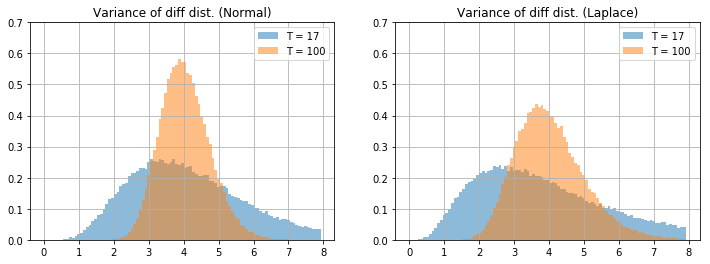

In [5]:
## Volatility of gaussian vs volatility of its difference.
var = 2
data_lap_17 = np.random.laplace(0, np.sqrt(var), (17, 100000))/np.sqrt(2)
data_norm_17 = np.random.normal(0, np.sqrt(var), (17, 100000))

data_lap_100 = np.random.laplace(0, np.sqrt(var), (100, 100000))/np.sqrt(2)
data_norm_100 = np.random.normal(0, np.sqrt(var), (100, 100000))

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

for i, data in enumerate([data_norm_17, data_lap_17, data_norm_100, data_lap_100]):
    
    ax = axs[i%2]
    ax.set_title(['Variance of diff dist. (Normal)', 'Variance of diff dist. (Laplace)'][i%2])
    ax.set_ylim(0, 1.4/var)
    
    df = pd.DataFrame(data).dropna()

    diff_var = df.diff().var()

    diff_var.describe()

    diff_var.hist(bins = np.arange(0, 4*var, .04*var), ax = ax, normed = True, alpha = .5, label = ['T = 17', 'T = 100'][i//2])
    ax.legend()

    out = pd.DataFrame(pd.concat([df.var().describe(), diff_var.describe()], axis = 1))
    out.columns = ['Distrib', 'Difference Distrib']

#     print(out.round(2).to_latex())
    
plt.savefig('./../../../WRITING/FIGURES/trade/diff_dists_var'+str(var)+'.png')


In [6]:
'/diff_dists_var'+str(var)+'.png'

'/diff_dists_var2.png'

In [10]:
1/2.125492

0.4704793054972684